In [0]:
from keras.datasets import boston_housing
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.optimizers import SGD
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt


In [0]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [0]:
### Standardize data in entry (column by column) and use the standardization parameters of the train to then standardize the test

# Substract mean
mean = x_train.mean(axis=0)
x_train -= mean
x_test -= mean

# Divide by std deviation
std = x_train.std(axis=0)
x_train /= std
x_test /= std

In [502]:
'''
OLD - BEFORE USE OF 3-FOLD CROSS VALIDATION

# Train and validation split
x_train_1 = x_train[:350]
x_validation = x_train[350:]

y_train_1 = y_train[:350]
y_validation = y_train[350:]
'''

'\nOLD - BEFORE USE OF 3-FOLD CROSS VALIDATION\n\n# Train and validation split\nx_train_1 = x_train[:350]\nx_validation = x_train[350:]\n\ny_train_1 = y_train[:350]\ny_validation = y_train[350:]\n'

In [0]:
# Data partition for 3-fold cross validation (404 / 3 = 134.6)
a_x_train = x_train[:134] 
b_x_train = x_train[134:269]
c_x_train = x_train[269:]

a_y_train = y_train[:134] 
b_y_train = y_train[134:269]
c_y_train = y_train[269:]

In [0]:
# Loss de regression : MSE !
# Metrique de regression : MAE ! 
# On utilise une fonction pour faire de la validaito croisée par la suite

def build_model():
  model = Sequential()
  model.add(Dense(64, activation='relu', input_dim = 13))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1))

  sgd = SGD(lr = 0.0001)

  model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae'])

  return model

In [0]:
model = build_model()

In [0]:
def mae(x_train, y_train, x_validation, y_validation):
  model = build_model()
  history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation) ,epochs = 100, verbose =0, batch_size = 1)
  mae = model.evaluate(x_train, y_train)[1]
  return mae, history

In [0]:
def cross_val(a_x_train, b_x_train, c_x_train, a_y_train, b_y_train, c_y_train):
  a = mae(np.vstack((b_x_train, c_x_train)), np.append(b_y_train, c_y_train),  a_x_train, a_y_train)
  b = mae(np.vstack((a_x_train, c_x_train)), np.append(a_y_train, c_y_train), b_x_train, b_y_train)
  c = mae(np.vstack((a_x_train, b_x_train)), np.append(a_y_train, b_y_train), c_x_train, c_y_train)
  result = [a[0], b[0], c[0]]
  #result = np.mean(result, axis = 0)
  return result, a[1], b[1], c[1]

In [508]:
results = cross_val(a_x_train, b_x_train, c_x_train, a_y_train, b_y_train, c_y_train)

269/269 [==============================] - 0s 56us/step


In [509]:
# MSE des validations croisées
results[0]

[1.2074085703602544, 1.1696356880620509, 1.417670920435824]

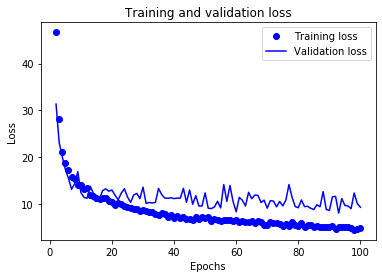

In [510]:
# Plot training and validation loss (1st fold)

history_dict = results[1].history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs[1:], loss_values[1:], 'bo', label='Training loss')
plt.plot(epochs[1:], val_loss_values[1:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

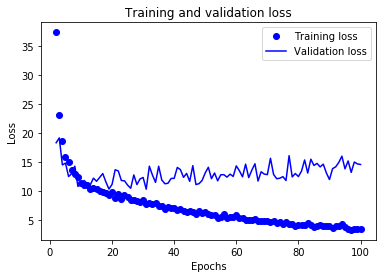

In [511]:
# Plot training and validation loss (2nd fold)

history_dict = results[2].history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs[1:], loss_values[1:], 'bo', label='Training loss')
plt.plot(epochs[1:], val_loss_values[1:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

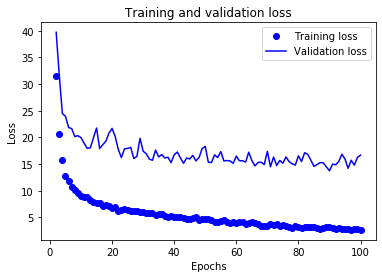

In [512]:
# Plot training and validation loss (3rd fold)

history_dict = results[3].history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs[1:], loss_values[1:], 'bo', label='Training loss')
plt.plot(epochs[1:], val_loss_values[1:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [513]:
# Model final
model = build_model()
model.fit(x_train, y_train,epochs = 100, verbose =0, batch_size = 1)
model.evaluate(x_test, y_test)

102/102 [==============================] - 2s 19ms/step


[14.546694587258731, 2.4408379442551555]

In [516]:
model.predict(x_test[18].reshape(1,13))

array([[20.571383]], dtype=float32)

In [517]:
y_test[18]

19.1